## ME323 C - Porta dos Desesparados

Fernanda de Alencar Barbosa - 215825 <br>
Gustavo Nascimento Soares - 217530

In [34]:
import random as rd
import matplotlib.pyplot as plt

### Stablishment of the problem's variables ans arrays

In [35]:
# constants of the experiment
N = 5000
nDoors = 3

# auxiliar function to find the last option to reveal of switch doors
def finalOption(a, b):
    options = [i+1 for i in range(nDoors)]
    options.remove(a)
    options.remove(b)
    return options[0]
    
rightAnswer = [rd.randint(1, nDoors) for i in range(N)] # number of the right door
guess = { # NS == No Switch, S == Switch
    'NS': [rd.randint(1, nDoors) for i in range(N)],
    'S': [],
    }
reveal = [] # number of revealed door

for i in range(N):
    # if the contestant is right, reveal either of the other doors
    # else, reveal the other wrong door
    if rightAnswer[i] == guess['NS'][i]:
        options = [i+1 for i in range(nDoors)]
        options.remove(rightAnswer[i])
        reveal.append(rd.choice(options))
    else:
        reveal.append(finalOption(guess['NS'][i], rightAnswer[i]))

# the only option to switch is to the door not revealed
for i in range(N):
    guess['S'].append(finalOption(guess['NS'][i], reveal[i]))

### Evaluation of the experiments

In [ ]:
result = {
    'NS': [True if rightAnswer[i] == guess['NS'][i] else False for i in range(N)],
    'S': [True if rightAnswer[i] == guess['S'][i] else False for i in range(N)],
}

pct = {
    'NS': result['NS'].count(True)/N*100,
    'S': result['S'].count(True)/N*100,	
}

### Calculation of the frequency of right answers

In [41]:
Freq = { # frequency of right answers
    'NS': [],
    'S': [],
}
for key in result.keys():
    count = 0
    for i in range(N):
        if result[key][i]:
            count += 1
        Freq[key].append(count/(i+1))

### Plotting and visualization of the result

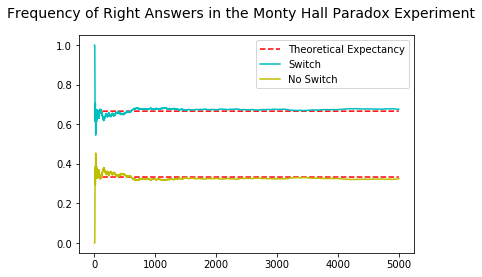

Final frequency:
	No Switch: 32.460%
	Switch: 67.540%


In [43]:
fig = plt.figure()
x = range(1, N+1)
plt.plot(x, [1/3]*N, 'r', linestyle='--', label='Theoretical Expectancy')
plt.plot(x, [2/3]*N, 'r', linestyle='--')
plt.plot(x, Freq['S'], 'c', label='Switch')
plt.plot(x, Freq['NS'], 'y', label='No Switch')
fig.suptitle('Frequency of Right Answers in the Monty Hall Paradox Experiment', fontsize=14)
plt.legend()
plt.show()
print("Final frequency:\n\tNo Switch: {0:.3f}%\n\tSwitch: {1:.3f}%".format(pct['NS'], pct['S']))